<a href="https://colab.research.google.com/github/cs625-datavis-fall20/assignments/blob/master/625_Week_02_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 625 - Week 02 - Data

This notebook goes along with the [Week-02 Data slides](https://docs.google.com/presentation/d/1ZKYXZkjnHy6VbW0Gs_azU_lrRt1pEQBaB6ffn5vzwwQ/edit) from [CS 625 Fall 2020](https://www.cs.odu.edu/~mweigle/CS625-F20/)

Google Colab tutorials and references:
* [Overview of Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
* [Welcome to Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb)
* [Loading Data](https://colab.research.google.com/notebooks/io.ipynb)
* [Colab and GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

Python tutorial from CS 432/532
* [slides](https://docs.google.com/presentation/d/1_BtQ5b7aG07xSw-BlcnCJT78qXxL2BqYEzug5Mz6cVU/edit?usp=sharing)
* [Google Colab notebook](https://github.com/cs432-websci-fall20/assignments/blob/master/432_Week_02_Python.ipynb)

## Regular Expressions

In [1]:
import re
request = "HEAD /foo HTTP/1.1"
pattern = re.compile(r"^([A-Z]+)\s+(\S+)\s+([A-Z0-9\/\.]+)$")
m = pattern.match(request)
m.groups()

('HEAD', '/foo', 'HTTP/1.1')

In [2]:
response = "HTTP/1.1 200 OK"
pattern = re.compile(r"^HTTP\/[0-9]\.[0-9]\s+([0-9]+)[\s+\S+]+$")
m = pattern.match(response)
m.groups()

('200',)

## requests Library

Accessing response headers

In [3]:
import requests
response = requests.get('http://example.com')

print ("Status Code: {}".format(response.status_code))
print ("URI: {}\n".format(response.url))

print ("Headers: {}\n".format(response.headers))
print ("Date: {}".format(response.headers['Date']))
print ("Content-Type: {}".format(response.headers['Content-Type']))
print ("Content-Length: {}".format(response.headers['Content-Length']))

Status Code: 200
URI: http://example.com/

Headers: {'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Age': '486330', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 19 Aug 2020 18:53:38 GMT', 'Etag': '"3147526947"', 'Expires': 'Wed, 26 Aug 2020 18:53:38 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECS (dcb/7FA6)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}

Date: Wed, 19 Aug 2020 18:53:38 GMT
Content-Type: text/html; charset=UTF-8
Content-Length: 648


Using request query parameters

URI requested: http://www.google.com/search?q=LSU
Status Code: 200

<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>LSU - Google Search</title><script nonce="TImgiEuYZCWUjzs4ndXfOA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.w
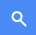

In [4]:
import requests
response = requests.get('http://google.com/search', params={'q': 'LSU'})
print ("URI requested: {}".format(response.request.url))
print ("Status Code: {}\n".format(response.status_code))

lines = response.text.splitlines() # split the string into a list, one line per element

# use loop to only print first 5 lines of the response
for i in range(5):
  print(lines[i])

## Beautiful Soup Library

*Print all the links (`a href=`) in a webpage*

In [ ]:
from bs4 import BeautifulSoup
import requests

response = requests.get('http://google.com/search', params={'q': 'LSU'})

soup = BeautifulSoup(response.text)
for links in soup.find_all('a'):
  print(links.get('href'))

Filter URIs -- print only links that start with `/url?q=`, strip that off, and stop at first `&`

Use https://regex101.com/ for testing the regex

In [5]:
from bs4 import BeautifulSoup
import requests
import re

response = requests.get('http://google.com/search', params={'q': 'LSU'})

pattern = re.compile('\/url\?q=([^&]+)')

soup = BeautifulSoup(response.text)
for links in soup.find_all('a'):
  href = links.get('href')
  m = pattern.match(href)
  if (m != None):
    print (m.groups()[0])

https://www.espn.com/nfl/story/_/id/29695685/two-women-say-former-washington-running-back-derrius-guice-raped-lsu-2016
https://www.usatoday.com/story/sports/ncaaf/sec/2020/08/19/ex-washington-nfl-player-derrius-guice-accused-rape-while-lsu/3391053001/
https://www.theroot.com/former-washington-running-back-derrius-guice-accused-of-1844775541
https://www.saturdaydownsouth.com/lsu-football/report-former-lsu-defender-enters-ncaa-transfer-portal/
https://247sports.com/college/lsu/Article/LSU-football-grabs-top-5-ranking-in-yahoo-sports-updated-top-25-150464155/
https://www.theadvocate.com/baton_rouge/sports/lsu/article_f25598f6-e18c-11ea-9129-e39820a1ab09.html
https://www.theadvocate.com/baton_rouge/sports/lsu/article_71f6652e-e195-11ea-8beb-fbd745069853.html
https://www.wbrz.com/news/former-football-star-derrius-guice-accused-of-raping-two-women-during-his-freshman-year-at-lsu/
https://www.wafb.com/2020/08/19/report-two-women-claim-derrius-guice-raped-them-lsu/
https://www.theadvocate.com/